```
After combing through the movies data that we have available, we want to find out:
- How many movies were produced each year
- The top five highest grossing films domestically per year
- The top five highest grossing films foreign per year
- The studios with the highest grossing film sales per year
 
    
    
```

```We start by importing the libraries we need:```

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import csv

```
We then proceed to read the csv files with the data we need:
```

In [181]:
# Opening bom.movie_gross.csv file
df_movie_gross = pd.read_csv("./data/bom.movie_gross.csv")
#Opening title.basics.csv
df_movie_title_basics = pd.read_csv("./data./title.basics.csv")
#Opening  title.ratings.csv
df_movie_ratings = pd.read_csv("./data./title.ratings.csv")



print(df_movie_gross)
# print(df_movie_title_basics)
# print(df_movie_ratings)







                                            title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


```Let's begin cleaning our data by checking for duplicates in each dataframe afterwhich we run tests to check whether there are duplicates:```

In [168]:
#check for duplicates and in all data frames
duplicate_movie_gross = df_movie_gross.columns.duplicated().sum()
duplicate_movie_title_basics = df_movie_title_basics.columns.duplicated().sum()
duplicate_movie_ratings = df_movie_gross.columns.duplicated().sum()

#assert duplicates rows for each dataframe is 0
assert duplicate_movie_gross  == 0
assert duplicate_movie_title_basics  == 0
assert duplicate_movie_ratings  == 0







```Also lets drop NAN from all dataframes:```

```Next lets begin working with our first dataframe, that contains the revnue figures for each movie produced every year, this variable is called df_movie_gross. Let also check if datframe colums have the right data types```

In [184]:
#check data type for each column to check if its the correct values
print(df_movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


```The foreign gross column is of object type. It should be an interger or float run a test on the dataframe to check datatypes ```


In [186]:
# Convert 'foreign_gross' column to numeric, handling missing values
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')

# Convert 'foreign_gross' column to integer, excluding NaN values
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype('Int64')

print(df_movie_gross)

                                            title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

```Now lets remove values from the dataframe that are NAN:```

In [191]:
df_movie_gross=df_movie_gross.dropna().reset_index(drop=True)

```Now let us start making sense of the data. First lets check the number of movies that have been produced each year in a histogram:```

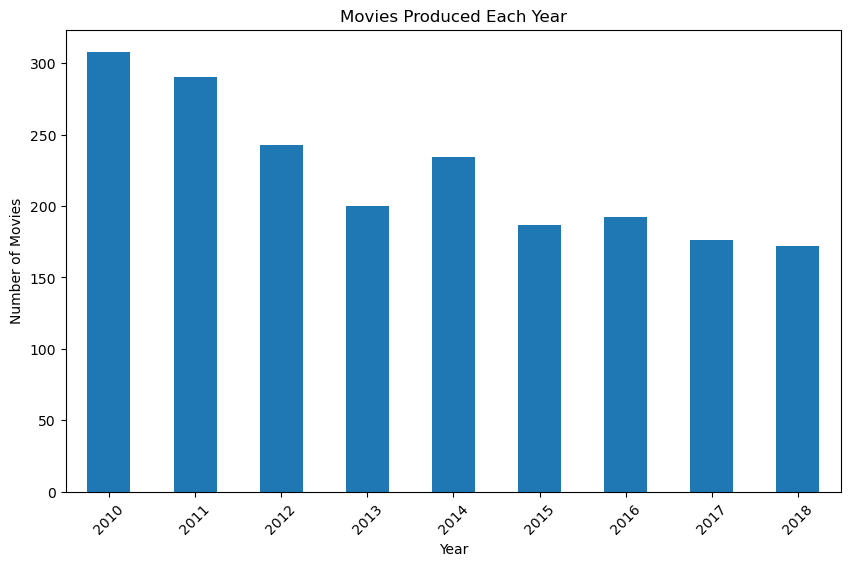

In [192]:

# Group the data by 'year' and count the number of movies in each year
movies_per_year = df_movie_gross.groupby('year').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Produced Each Year')
plt.xticks(rotation=45)
plt.show()


<p>From the above Data we can conclude that movie production has been declining. We need to find out why? Is it that the revenues have been declining?</p>
<p>Let us check the domestic and foreign  revenues and how they were over the years</p>

      domestic_gross  foreign_gross
year                               
2010    1.015274e+10    14369371098
2011    9.915690e+09    15662866996
2012    1.069786e+10    17002984997
2013    1.055885e+10    16580242298
2014    1.014798e+10    16956667698
2015    8.802869e+09    15154353099
2016    1.086969e+10    18981389300
2017    1.029077e+10    19928931997
2018    1.008556e+10    17474489200


<Figure size 1000x600 with 0 Axes>

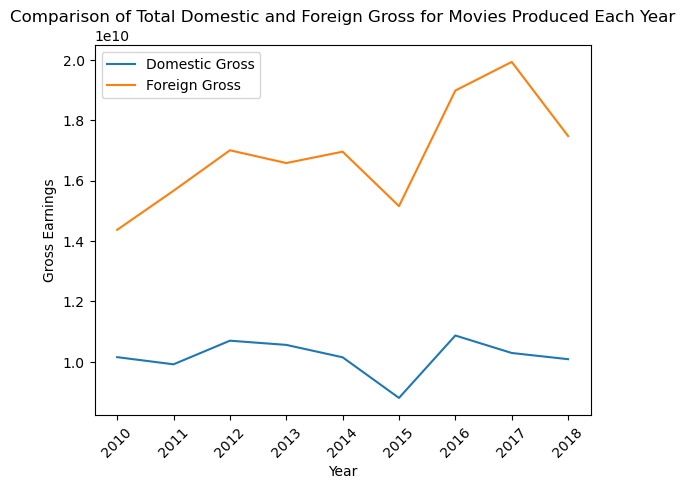

In [193]:
# Group the data by 'year' and calculate the sum of 'domestic_gross' and 'foreign_gross' for each year
gross_per_year = df_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

print(gross_per_year)
# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
gross_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.title('Comparison of Total Domestic and Foreign Gross for Movies Produced Each Year')
plt.xticks(rotation=45)
plt.legend(['Domestic Gross', 'Foreign Gross'], loc='upper left')
plt.show()

In [196]:
# Group the data by 'studio' and calculate the sum of 'domestic_gross' and 'foreign_gross' for each studio
gross_per_studio = df_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Display the total domestic and foreign gross for each studio
print(gross_per_studio)

        domestic_gross  foreign_gross
studio                               
3D        6.100000e+06        9900000
A24       2.604568e+08      238462200
AF        1.155000e+06        3500000
AGF       1.580000e+04         161000
AR        3.500000e+05       57700000
...                ...            ...
WOW       3.080000e+04          18600
Wein.     1.471817e+09     2624085999
Yash      2.247380e+07      272760700
Zee       1.100000e+06         571000
Zeit.     1.729200e+06       20300000

[172 rows x 2 columns]


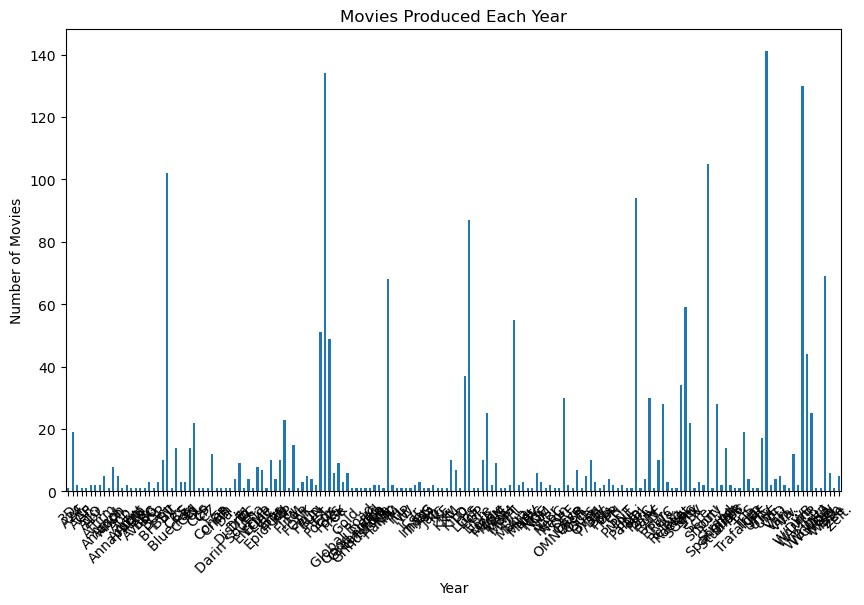

In [198]:

# Group the data by 'year' and count the number of movies in each year
# movies_per_year = df_movie_gross.groupby('studio').size()

# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# movies_per_year.plot(kind='bar')
# plt.xlabel('Year')
# plt.ylabel('Number of Movies')
# plt.title('Movies Produced Each Year')
# plt.xticks(rotation=45)
# plt.show()